✅ Dataset Loaded Successfully
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


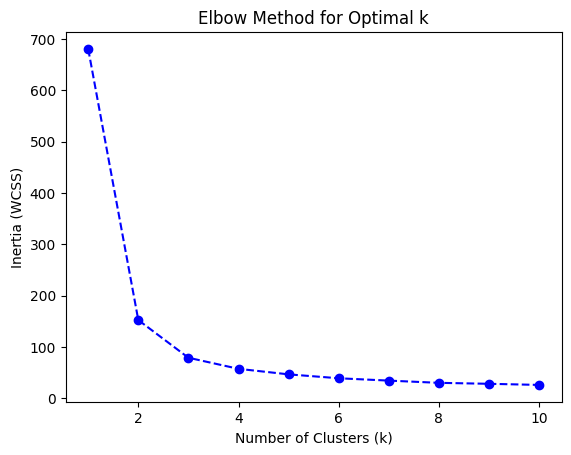


Cluster Counts:
 Cluster
0    62
1    50
2    38
Name: count, dtype: int64

Cluster Centers:
    sepal_length  sepal_width  petal_length  petal_width
0      5.901613     2.748387      4.393548     1.433871
1      5.006000     3.418000      1.464000     0.244000
2      6.850000     3.073684      5.742105     2.071053


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = pd.read_csv(url)
print("✅ Dataset Loaded Successfully\n", df.head())

# Prepare features (exclude target)
X = df.drop("species", axis=1)

# Elbow Method for optimal K
inertia = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(X).inertia_ for k in range(1, 11)]
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='blue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()

# Apply KMeans (k=3 for Iris)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

# Results
print("\nCluster Counts:\n", df["Cluster"].value_counts())
print("\nCluster Centers:\n", pd.DataFrame(kmeans.cluster_centers_, columns=X.columns))
